In [1]:
import pandas as pd
import json
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Cambiar el directorio de trabajo al directorio donde se encuentran los archivos JSON
%cd .\florida_data

# Obtener una lista de archivos en el directorio actual
archivos = os.listdir()

# Crear un DataFrame vacío para almacenar los datos
df_florida = pd.DataFrame()

# Iterar sobre cada archivo en la lista de archivos
for archivo in archivos:
    # Verificar si el archivo tiene la extensión .json
    if archivo.endswith('.json'):
        # Leer el archivo JSON y cargarlo en un DataFrame
        data = pd.read_json(archivo, lines=True)
        # Concatenar los datos del archivo al DataFrame principal
        df_florida = pd.concat([df_florida, data], axis=0)
print("finalizo cargan de datos")

c:\Users\sebas\OneDrive\Escritorio\Proyecto-Grupal-Google-yelp\Sprint 1 Propuesta de Trabajo\EDA Google\florida_data
Cargando data  1.json ...
Cargando data  10(1).json ...
Cargando data  10.json ...
Cargando data  11.json ...
Cargando data  12.json ...
Cargando data  13.json ...
Cargando data  14.json ...
Cargando data  15.json ...
Cargando data  16.json ...
Cargando data  17.json ...
Cargando data  18.json ...
Cargando data  19.json ...
Cargando data  2.json ...
Cargando data  3.json ...
Cargando data  4.json ...
Cargando data  5.json ...
Cargando data  6.json ...
Cargando data  7.json ...
Cargando data  8.json ...
Cargando data  9.json ...


In [6]:
df_florida.shape

(3000000, 8)

In [14]:
df_florida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500000 entries, 0 to 4499999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 274.7+ MB


In [15]:
times = []
for data in df_florida['time'] / 1000:
    times.append(datetime.datetime.utcfromtimestamp(data).strftime('%d/%m/%Y %H:%M:%S'))

df_florida['time_normalizado'] = times


In [16]:
# Filtrado de columnas
df_florida = df_florida[['user_id','name','time_normalizado','rating','text','gmap_id']]

In [17]:
df_florida.head(1)

,user_id,name,time_normalizado,rating,text,gmap_id
0,1.014719e+20,Julie A. Gerber,03/08/2021 15:07:30,1,Update: Their “reply” to my review amounted to...,0x8893863ea87bd5dd:0x9383ebf973e74abb


In [18]:
df_florida['user_id'] = df_florida['user_id'].astype(object)

In [19]:
df_florida.isnull().sum()

user_id                   0
name                      0
time_normalizado          0
rating                    0
text                1685161
gmap_id                   0
dtype: int64

In [20]:
# Porcentaje de nulos en "text" sobre el total de entradas
print("{} %".format(int(round(1139181 / df_florida.shape[0] * 100))))

25 %


In [21]:
df_florida.duplicated().sum()

1769396

In [ ]:
df_florida.dropna(inplace=True)
df_florida.drop_duplicates(inplace=True)
df_florida.reset_index(drop=True,inplace=True)

In [ ]:
df_florida.shape

(1656239, 6)

In [3]:
# df_florida.to_csv('D:\Escritorio\EDA\DATA\df_florida.csv', index=False)

df_florida = pd.read_csv('D:\Escritorio\EDA\DATA\df_florida.csv')

Análisis de distribución de ratings

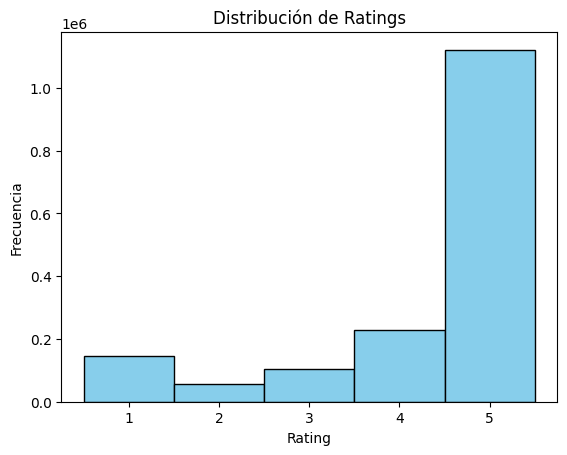

In [4]:
# Definimos los límites de las categorías de rating
rating_bins = np.arange(0.5, 6.5, 1)

# Visualizamos la distribución de los ratings mediante un histograma
plt.hist(df_florida['rating'], bins=rating_bins, color='skyblue', edgecolor='black', align='mid')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ratings')
plt.xticks(np.arange(1, 6, 1))  # Establecemos las marcas en el eje x para que coincidan con los valores de rating
plt.show()



Distribución temporal de los comentarios

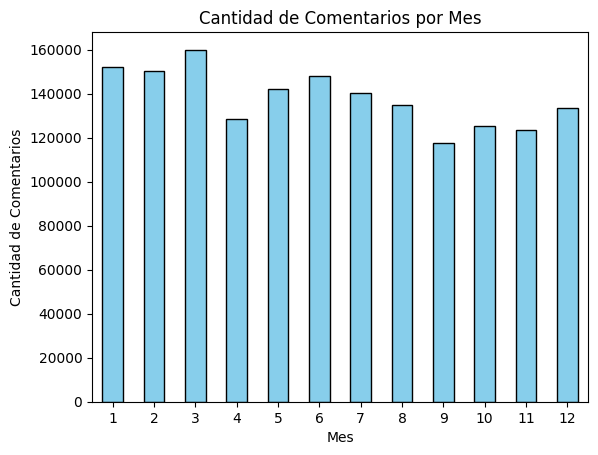

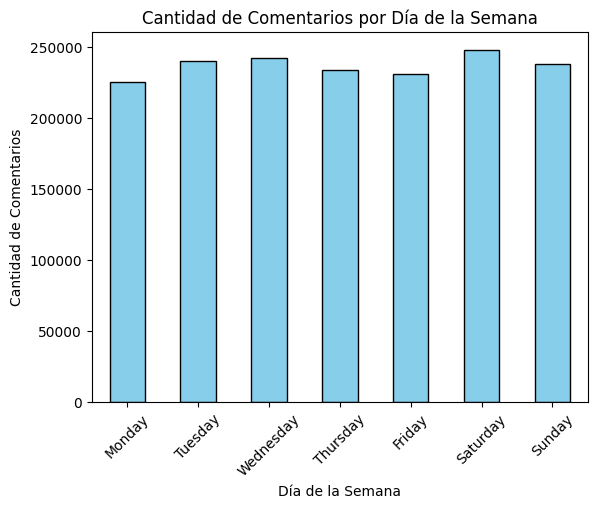

In [7]:
# Convierte la columna 'time_normalizado' a datetime con el formato adecuado
df_florida['time_normalizado'] = pd.to_datetime(df_florida['time_normalizado'], format='%d/%m/%Y %H:%M:%S')

# Extrae el mes y el día de la semana
df_florida['mes'] = df_florida['time_normalizado'].dt.month
df_florida['dia_semana'] = df_florida['time_normalizado'].dt.day_name()

# Visualiza la cantidad de comentarios por mes
comentarios_por_mes = df_florida.groupby('mes').size()
comentarios_por_mes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Comentarios')
plt.title('Cantidad de Comentarios por Mes')
plt.xticks(rotation=0)
plt.show()

# Visualiza la cantidad de comentarios por día de la semana
dias_semana_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
comentarios_por_dia = df_florida.groupby('dia_semana').size().reindex(dias_semana_orden)
comentarios_por_dia.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Comentarios')
plt.title('Cantidad de Comentarios por Día de la Semana')
plt.xticks(rotation=45)
plt.show()


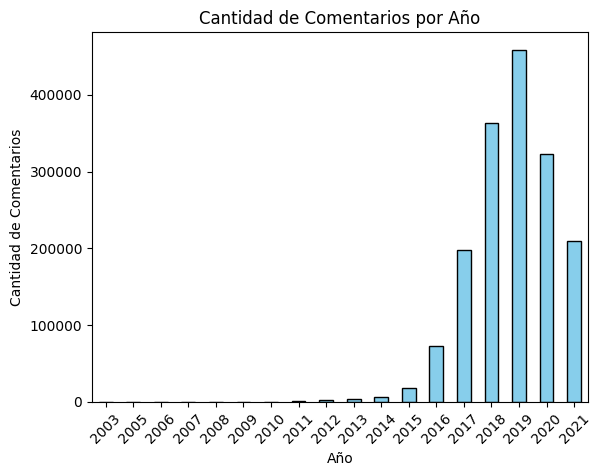

In [8]:
# Extrae el año de la columna 'time_normalizado'
df_florida['año'] = df_florida['time_normalizado'].dt.year

# Visualiza la cantidad de comentarios por año
comentarios_por_año = df_florida.groupby('año').size()
comentarios_por_año.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Año')
plt.ylabel('Cantidad de Comentarios')
plt.title('Cantidad de Comentarios por Año')
plt.xticks(rotation=45)
plt.show()


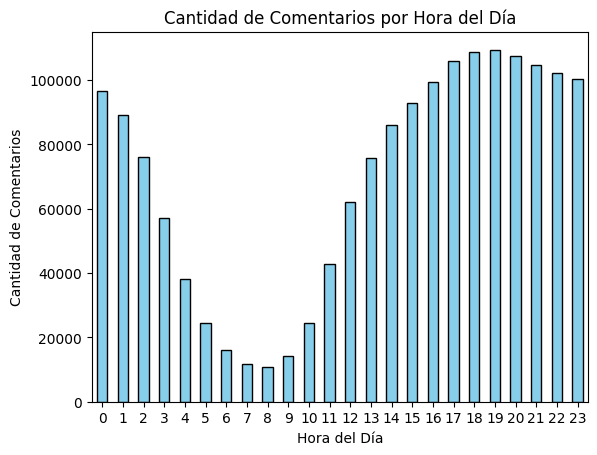

In [9]:
# Extrae la hora de la columna 'time_normalizado'
df_florida['hora'] = df_florida['time_normalizado'].dt.hour

# Visualiza la cantidad de comentarios por hora del día
comentarios_por_hora = df_florida.groupby('hora').size()
comentarios_por_hora.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Comentarios')
plt.title('Cantidad de Comentarios por Hora del Día')
plt.xticks(rotation=0)
plt.show()


conteo  de usuarios únicos


In [11]:
# Podemos contar los usuarios únicos utilizando el método nunique()
usuarios_unicos = df_florida['user_id'].nunique()

# Imprimimos el resultado
print("Cantidad de usuarios únicos que han realizado comentarios:", usuarios_unicos)


Cantidad de usuarios únicos que han realizado comentarios: 671458


Tengo 1656239 filas de las cuales  671458 son entradas de usuarios unicos a dichas filas. Para saber cuantos entradas por usuario hay en dataset hay que calcular un ratio.

In [14]:
# Calculamos el ratio de entradas por usuario
ratio_entradas_por_usuario = round(1656239 / 671458, 2)

# Imprimimos el resultado
print("Ratio de entradas por usuario en el dataset:", ratio_entradas_por_usuario)

Ratio de entradas por usuario en el dataset: 2.47
